| Atribut | Popis | Typ dat |
| --- | --- | --- |
| Fighter_Id | Unikátní identifikátor zápasníka v datasetu | text |
| Full Name | Celé jméno zápasníka | text |
| Nickname | Přezdívka zápasníka | text |
| Ht. | Výška zápasníka ve stopách | číslo |
| Wt. | Hmotnost zápasníka v librách | číslo |
| Stance | Preferovaný bojový postoj | text |
| W | Počet výher v kariéře | číslo |
| L | Počet proher v kariéře | číslo |
| D | Počet remíz v kariéře | číslo |
| Belt | Informace, zda zápasník drží titul | logická |
| Round | Průměrný počet kol na zápas | číslo |
| KD | Průměrný počet knockdownů na zápas | číslo |
| STR | Průměrný počet významných úderů na zápas | číslo |
| TD | Průměrný počet takedownů na zápas | číslo |
| SUB | Průměrný počet submisí na zápas | číslo |
| Ctrl | Průměrný čas kontroly soupeře | číslo |
| Sig. Str. % | Úspěšnost významných úderů v procentech | číslo |
| Head_% | Podíl úderů mířených na hlavu v procentech | číslo |
| Body_% | Podíl úderů mířených na tělo v procentech | číslo |
| Leg_% | Podíl úderů mířených na nohy v procentech | číslo |
| Distance_% | Podíl úderů z distanční vzdálenosti | číslo |
| Clinch_% | Podíl úderů z klinče | číslo |
| Ground_% | Podíl úderů na zemi | číslo |
| Sub. Att | Průměrný počet pokusů o submisi | číslo |
| Rev. | Průměrný počet reverzí | číslo |
| Weight_Class | Poslední váhová kategorie zápasníka | text |
| Gender | Pohlaví zápasníka | text |
| Fighting Style | Deklarovaný bojový styl zápasníka | text |

# UFC Zápasníci - Explorativní Datová Analýza
Tento jupyter notebook shrnuje základní průzkum datasetu `Fighters Stats.csv`, včetně přehledu dat, vyhodnocení chybějících hodnot, vizualizací a škálování vybraných numerických atributů pomocí Min-Max transformace.

## 1. Načtení knihoven a dat
Nejprve importujeme potřebné knihovny, načteme dataset a zobrazíme základní informace o počtu záznamů a sloupců.

In [1]:
from pathlib import Path # Knihovna pro práci s cestami k souborům
import pandas as pd # Knihovna pro práci s daty
import numpy as np # Knihovna pro numerické výpočty
import matplotlib.pyplot as plt # Knihovna pro vizualizaci dat
import seaborn as sns # Knihovna pro pokročilou vizualizaci dat
from sklearn.preprocessing import MinMaxScaler # Knihovna pro škálování dat

sns.set_theme(style="whitegrid", palette="deep")

# Do proměnné DATA_PATH uložíme cestu k souboru s daty pomocí knihovny Path
DATA_PATH = Path("Fighters Stats.csv")
df = pd.read_csv(DATA_PATH) # Pomocí pandas načteme data ze souboru do DataFrame

print(f"Počet zápasníků: {df.shape[0]}") # Vypíšeme počet řádků (zápasníků) v DataFrame
print(f"Počet sloupců: {df.shape[1]}") # Vypíšeme počet sloupců v DataFrame

Počet zápasníků: 2581
Počet sloupců: 28


## 2. Základní přehled datasetu
Níže je ukázka prvních řádků a souhrnná statistika numerických atributů. Dále kontrolujeme datové typy, abychom odhalili případné nenumerické sloupce.

In [2]:
df.head() # funkce head zobrazí prvních 5 řádků DataFrame

,Fighter_Id,Full Name,Nickname,Ht.,Wt.,Stance,W,L,D,Belt,...,Body_%,Leg_%,Distance_%,Clinch_%,Ground_%,Sub. Att,Rev.,Weight_Class,Gender,Fighting Style
0,Danny 'The Assassin' Abbadi,Danny Abbadi,The Assassin,5.11,155.0,Orthodox,4,6,0,False,...,0.89,0.00,0.27,0.55,0.38,0.00,0.00,Lightweight,Male,Hybrid
1,David 'Tank' Abbott,David Abbott,Tank,6.00,265.0,Switch,10,15,0,False,...,0.28,0.00,0.32,0.35,0.38,0.22,0.06,Heavyweight,Male,Hybrid
2,Hamdy 'The Hammer' Abdelwahab,Hamdy Abdelwahab,The Hammer,6.20,264.0,Southpaw,6,1,0,False,...,0.78,0.80,0.46,0.22,0.49,0.00,0.00,Heavyweight,Male,Striker
3,Mansur 'No Nickname' Abdul-Malik,Mansur Abdul-Malik,No Nickname,6.20,185.0,Orthodox,8,0,1,False,...,0.74,0.33,0.34,0.54,0.62,0.00,0.00,Middleweight,Male,Hybrid
4,Shamil 'Abrek' Abdurakhimov,Shamil Abdurakhimov,Abrek,6.30,235.0,Orthodox,20,8,0,False,...,0.42,0.68,0.30,0.38,0.38,0.09,0.00,Heavyweight,Male,Hybrid


In [3]:
df.info() # funkce info zobrazí přehled o datech v DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fighter_Id      2581 non-null   object 
 1   Full Name       2581 non-null   object 
 2   Nickname        2581 non-null   object 
 3   Ht.             2581 non-null   float64
 4   Wt.             2581 non-null   float64
 5   Stance          2581 non-null   object 
 6   W               2581 non-null   int64  
 7   L               2581 non-null   int64  
 8   D               2581 non-null   int64  
 9   Belt            2581 non-null   bool   
 10  Round           2581 non-null   float64
 11  KD              2581 non-null   float64
 12  STR             2581 non-null   float64
 13  TD              2581 non-null   float64
 14  SUB             2581 non-null   float64
 15  Ctrl            2581 non-null   float64
 16  Sig. Str. %     2581 non-null   float64
 17  Head_%          2581 non-null   f

In [4]:
numeric_summary = df.describe().T # funkce describe() poskytne statistický přehled o numerických sloupcích
# T transponuje výstup
numeric_summary
# count je počet ne-null hodnot
# mean je průměrná hodnota
# std je směrodatná odchylka
# min je minimální hodnota
# 25% je 1. kvartil
# 50% je medián
# 75% je 3. kvartil
# max je maximální hodnota

,count,mean,std,min,25%,50%,75%,max
Ht.,2581.0,5.753708,0.423851,5.0,5.40,5.80,6.100,6.8
Wt.,2581.0,168.843472,39.526680,115.0,145.00,155.00,185.000,770.0
W,2581.0,14.640837,9.676233,0.0,9.00,13.00,18.000,253.0
L,2581.0,6.192948,4.539829,0.0,3.00,5.00,8.000,53.0
D,2581.0,0.256490,0.790497,0.0,0.00,0.00,0.000,11.0
Round,2581.0,2.221573,0.627634,1.0,1.95,2.30,2.690,4.0
KD,2581.0,0.161306,0.241734,0.0,0.00,0.00,0.250,3.0
STR,2581.0,30.767637,20.207105,0.0,16.00,28.00,43.000,140.0
TD,2581.0,0.936652,0.990809,0.0,0.14,0.67,1.390,8.0
SUB,2581.0,0.347489,0.491314,0.0,0.00,0.17,0.500,4.5


## 3. Chybějící hodnoty
Chybějící hodnoty jsou agregovány podle absolutního a relativního počtu. Sloupce s nulovou mírou chybějících hodnot skrýváme, abychom se soustředili na problémové oblasti.

In [5]:
# isna() vrátí DataFrame stejné velikosti s hodnotami True/False
# sum() spočítá počet True hodnot v každém sloupci
missing_counts = df.isna().sum()  

# pomocí [] vybereme pouze sloupce s chybějícími hodnotami a pomocí sort_values() je seřadíme sestupně
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# do proměnné missing_df vytvoříme nový DataFrame s počtem a procentem chybějících hodnot
missing_df = pd.DataFrame({
    "missing": missing_counts, 
    # procento chybějících hodnot spočítáme jako počet chybějících hodnot děleno počtem řádků v DataFrame krát 100
    "missing_%": (missing_counts / len(df)) * 100 
})
missing_df

,missing,missing_%


Vidíme, že tabulka nemá data, takže dataframe nemá nulové hodnoty.

## 4. Vizualizace kategoriálních atributů
Zaměřujeme se na rozložení pohlaví, bojových postojů, stylů a váhových kategorií, abychom popsali zastoupení jednotlivých skupin.

### 4.1 Rozložení pohlaví

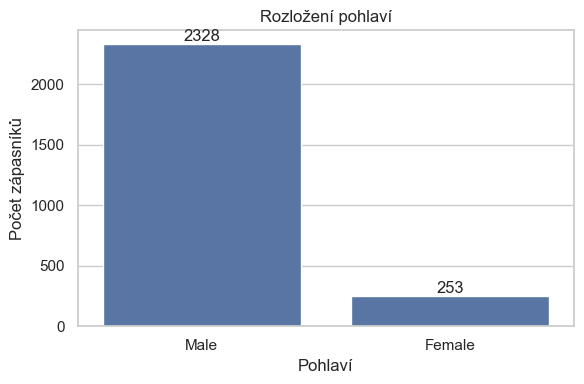

Gender
Male      2328
Female     253
Name: count, dtype: int64

In [6]:
# do proměnné gender_counts uložíme z dataframu df pomocí výběru ['Gender'] hodnoty a jejich četnost pomocí value_counts()
gender_counts = df['Gender'].value_counts(dropna=False)

# proměnná fig je objekt figure
# výška bude 4 palce, šířka 6 palců
# funkce subplots() vrátí figuru (což je celý obrázek) a osu (což je konkrétní graf v obrázku)
fig, ax = plt.subplots(figsize=(6, 4))

# pomocí seaborn knihovny vytvoříme barplot, kde na ose x budou indexy (pohlaví) a na ose y hodnoty (počet zápasníků)
# ax je osa, na kterou chceme graf vykreslit
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax)
ax.set_title('Rozložení pohlaví')
ax.set_xlabel('Pohlaví')
ax.set_ylabel('Počet zápasníků')

for container in ax.containers:
    ax.bar_label(container)

# tight_layout() zajistí, že se prvky grafu nebudou překrývat
plt.tight_layout()

# vykreslíme graf (plot)
plt.show()
gender_counts

### 4.2 Rozložení postojů (Stance)

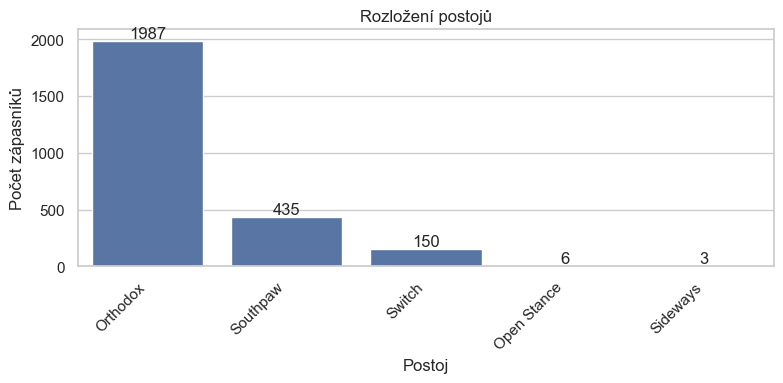

Stance
Orthodox       1987
Southpaw        435
Switch          150
Open Stance       6
Sideways          3
Name: count, dtype: int64

In [7]:
# Postoj je buď Ortodoxní, Southpaw, Switch, Open stance, nebo Sideways

# do proměnné stance_counts uložíme z dataframu df pomocí výběru ['Stance'] hodnoty a jejich četnost pomocí value_counts()
stance_counts = df['Stance'].value_counts()

# znovu pomocí seaborn knihovny vytvoříme barplot
# subplots nám vrátí figuru a osu, osu pak předáme do barplotu
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=stance_counts.index, y=stance_counts.values, ax=ax)
ax.set_title('Rozložení postojů')
ax.set_xlabel('Postoj')
ax.set_ylabel('Počet zápasníků')
ax.tick_params(axis='x', labelrotation=45)

# projdeme všechny popisky na ose x a nastavíme jejich zarovnání na pravou stranu
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')

# pro každý kontejner (sadu pruhů) v grafu přidáme popisky s hodnotami
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()
stance_counts

### 4.3 Fighting Style

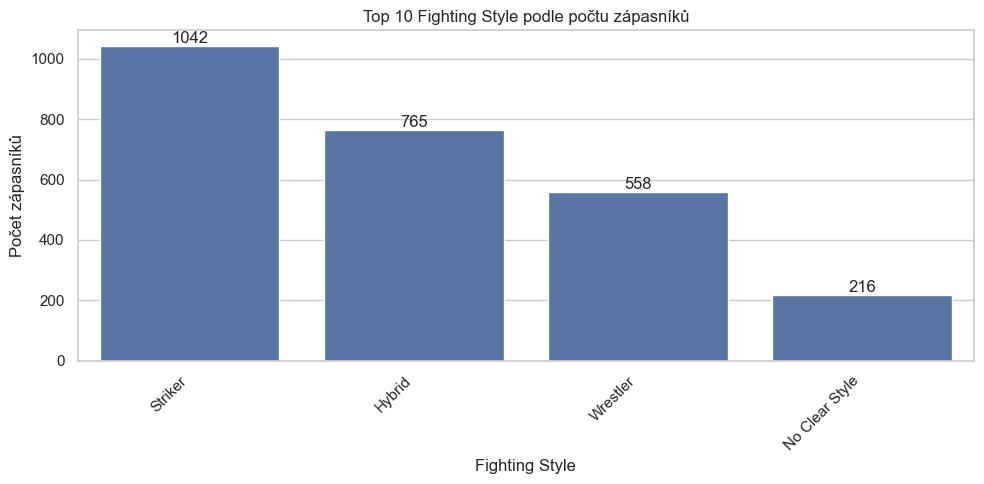

Fighting Style
Striker           1042
Hybrid             765
Wrestler           558
No Clear Style     216
Name: count, dtype: int64

In [8]:
# Striker, Hybrid, Wrestler nebo No Clear Style
# stejný postup jako výše
style_counts = df['Fighting Style'].value_counts()

top_n = 10
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=style_counts.head(top_n).index, y=style_counts.head(top_n).values, ax=ax)
ax.set_title(f'Top {top_n} Fighting Style podle počtu zápasníků')
ax.set_xlabel('Fighting Style')
ax.set_ylabel('Počet zápasníků')
ax.tick_params(axis='x', labelrotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()
style_counts

### 4.4 Weight Class

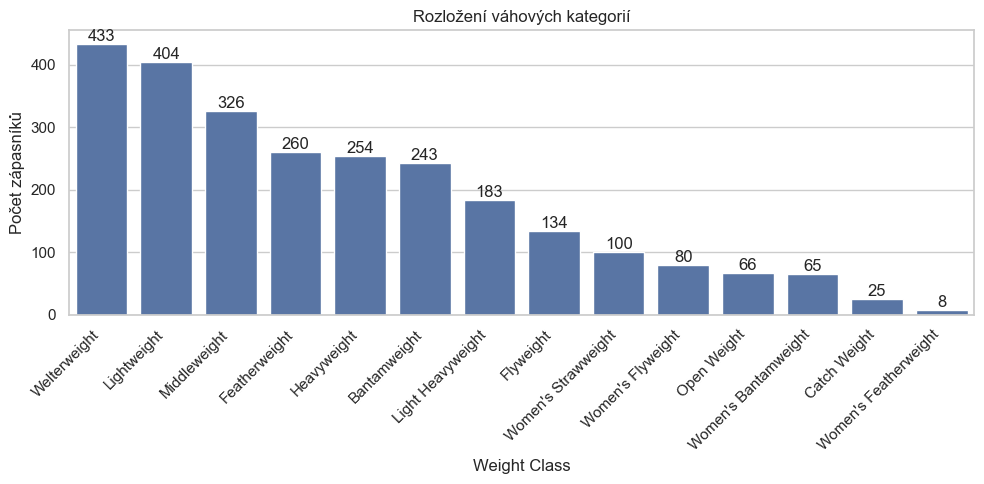

Weight_Class
Welterweight             433
Lightweight              404
Middleweight             326
Featherweight            260
Heavyweight              254
Bantamweight             243
Light Heavyweight        183
Flyweight                134
Women's Strawweight      100
Women's Flyweight         80
Open Weight               66
Women's Bantamweight      65
Catch Weight              25
Women's Featherweight      8
Name: count, dtype: int64

In [9]:
weight_counts = df['Weight_Class'].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=weight_counts.index, y=weight_counts.values, ax=ax)
ax.set_title('Rozložení váhových kategorií')
ax.set_xlabel('Weight Class')
ax.set_ylabel('Počet zápasníků')
ax.tick_params(axis='x', labelrotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()
weight_counts

## 5. Analýza numerických statistik
Níže se zaměřujeme na rozložení klíčových výkonových metrik a základní korelace mezi nimi.

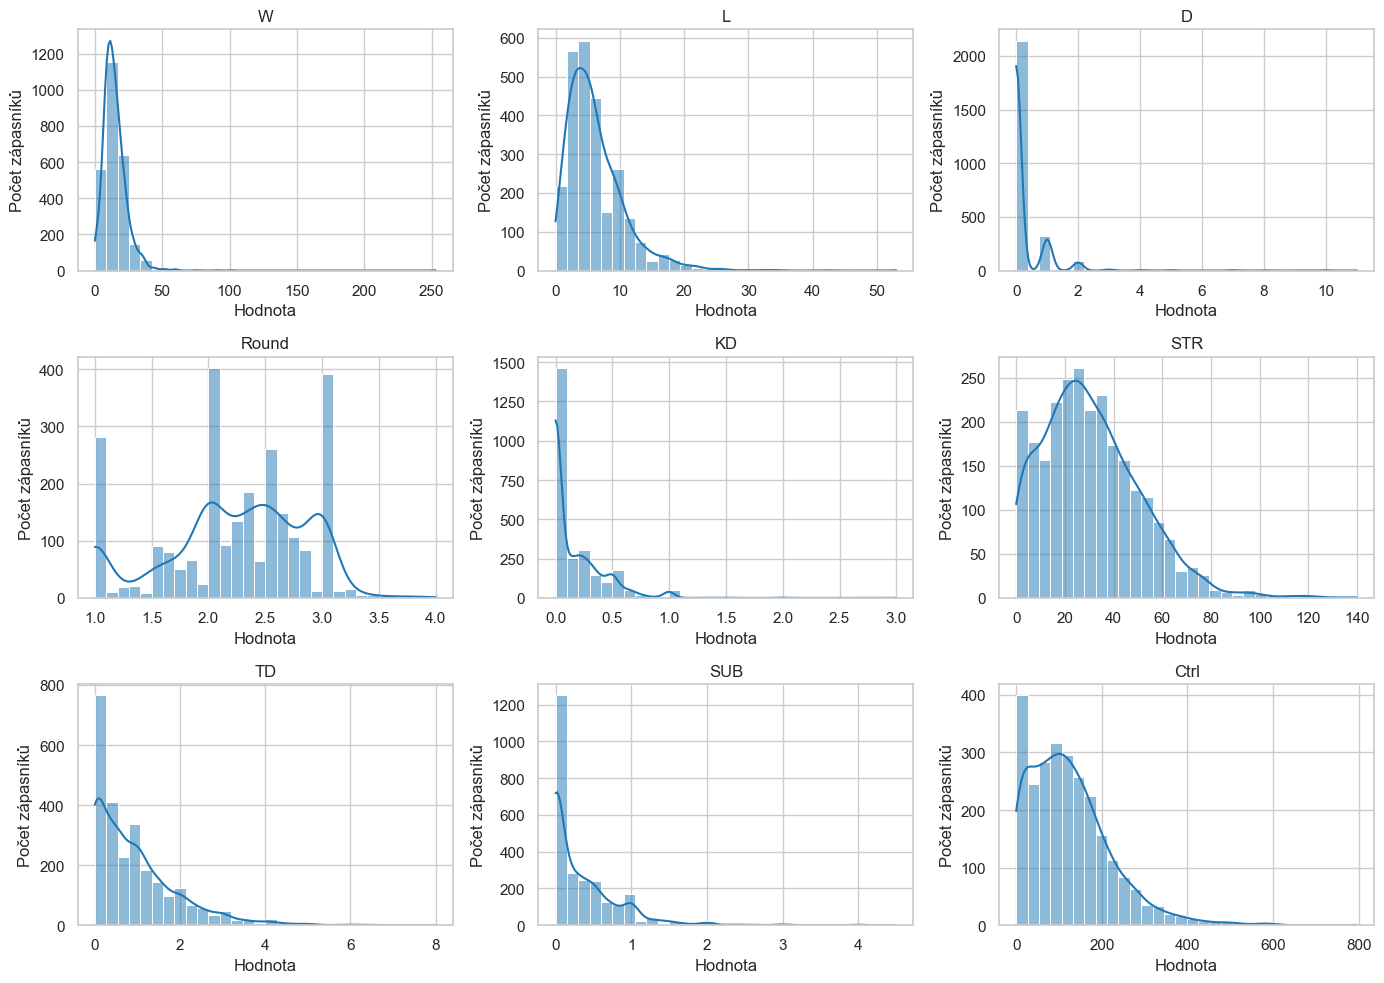

In [10]:
# Metriky: 
# W - počet výher
# L - počet proher
# D - počet remíz
# Round - průměrný počet kol na zápas
# KD - počet knockdownů
# STR - úspěšnost zásahů v %
# TD - úspěšnost takedownů v %
# SUB - počet submisí
# Ctrl - procento času v kontrole
performance_metrics = ['W', 'L', 'D', 'Round', 'KD', 'STR', 'TD', 'SUB', 'Ctrl']

# znovu vytvoříme subplots, tentokrát 3x3 - takže jich bude 9 (pro každou metriku jeden)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
# funkce flatten() převede 2D pole na 1D pole
axes = axes.flatten()

# pro každou metriku vytvoříme
for idx, metric in enumerate(performance_metrics):
    # graf s histogramem a hustotou pravděpodobnosti
    # histogram je tvořen sloupci, kde výška sloupce udává počet hodnot v daném intervalu
    # kdežto křivka hustoty pravděpodobnosti (KDE) ukazuje odhad rozložení dat
    # bins je pak počet sloupců v histogramu
    sns.histplot(df[metric], kde=True, ax=axes[idx], color='#1f77b4', bins=30)
    axes[idx].set_title(metric)
    axes[idx].set_xlabel('Hodnota')
    axes[idx].set_ylabel('Počet zápasníků')

# Skryj prázdný subplot, pokud počet metrik není násobkem 3
# Tedy pokud délka performance_metrics není 9 (délka axes je vždy 9)
if len(performance_metrics) < len(axes):
    # Pokud podmínka projde, tak projdeme všechny osy od indexu rovného délce performance_metrics až do konce axes
    for ax in axes[len(performance_metrics):]:
        # a vkryjeme je
        ax.axis('off')

plt.tight_layout()
plt.show()

### 5.1 Korelační matice výkonových ukazatelů

### Co je to korelační matice?

Korelační matice je tabulka, která ukazuje, jak silně spolu souvisí (korelují) různé číselné proměnné v datech. Každé číslo v této tabulce (tzv. korelační koeficient) nabývá hodnot od -1 do 1:
- Hodnota **1** znamená, že dvě proměnné spolu dokonale rostou (čím vyšší je jedna, tím vyšší je i druhá).
- Hodnota **-1** znamená, že spolu dokonale klesají (čím vyšší je jedna, tím nižší je druhá).
- Hodnota **0** znamená, že mezi proměnnými není žádná lineární souvislost.

Korelační matice nám tedy pomáhá rychle zjistit, které statistiky spolu v rámci datasetu zápasníků nejvíce souvisí.

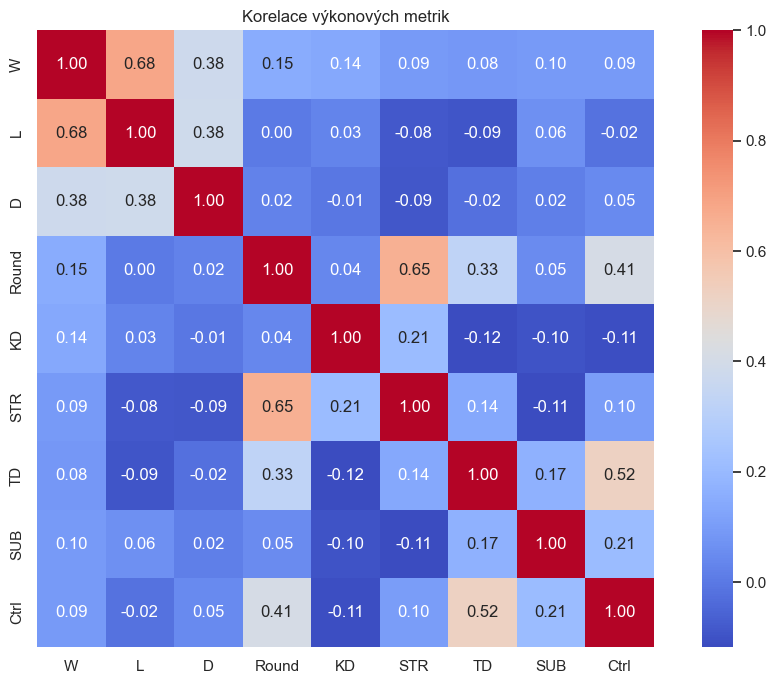

,W,L,D,Round,KD,STR,TD,SUB,Ctrl
W,1.000000,0.681834,0.378310,0.151941,0.138323,0.092208,0.084993,0.095798,0.092115
L,0.681834,1.000000,0.382148,0.004654,0.029971,-0.083007,-0.093446,0.063957,-0.017582
D,0.378310,0.382148,1.000000,0.024678,-0.006621,-0.090539,-0.023578,0.017407,0.045529
Round,0.151941,0.004654,0.024678,1.000000,0.036053,0.651943,0.326516,0.052619,0.407926
KD,0.138323,0.029971,-0.006621,0.036053,1.000000,0.206311,-0.117441,-0.097814,-0.112381
STR,0.092208,-0.083007,-0.090539,0.651943,0.206311,1.000000,0.135933,-0.113651,0.102628
TD,0.084993,-0.093446,-0.023578,0.326516,-0.117441,0.135933,1.000000,0.167151,0.523258
SUB,0.095798,0.063957,0.017407,0.052619,-0.097814,-0.113651,0.167151,1.000000,0.206503
Ctrl,0.092115,-0.017582,0.045529,0.407926,-0.112381,0.102628,0.523258,0.206503,1.000000


In [11]:
corr = df[performance_metrics].corr() # spočítáme korelační matici pro vybrané číselní metriky

# pomocí matplotlib vytvoříme figure o velikosti 10x7 palců
plt.figure(figsize=(10, 7))
# pomocí seaborn vykreslíme heatmapu korelační matice
# hodnota annot=True zajistí, že v každé buňce bude číslo
# fmt=".2f" určuje formát čísla na dvě desetinná místa 
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)

plt.title('Korelace výkonových metrik')
plt.tight_layout()
plt.show()
corr

### 5.2 Průměrné statistiky dle pohlaví
Následující tabulka porovnává průměrné hodnoty vybraných statistik mezi pohlavími.

In [12]:
# Do proměnné gender_means pomocí funkce groupby() seskupíme data podle pohlaví
# pak pomocí [performance_metrics] vybereme pouze číselné metriky - těch 9
# pak pomocí mean() spočítáme průměr pro každou metriku a zaokrouhlíme na 2 desetinná místa pomocí round(2)
gender_means = df.groupby('Gender')[performance_metrics].mean().round(2)
gender_means_long = gender_means.reset_index() # reset_index 
gender_means

,W,L,D,Round,KD,STR,TD,SUB,Ctrl
Gender,,,,,,,,,
Female,10.75,5.08,0.12,2.59,0.08,45.39,1.00,0.32,154.59
Male,15.06,6.31,0.27,2.18,0.17,29.18,0.93,0.35,121.34


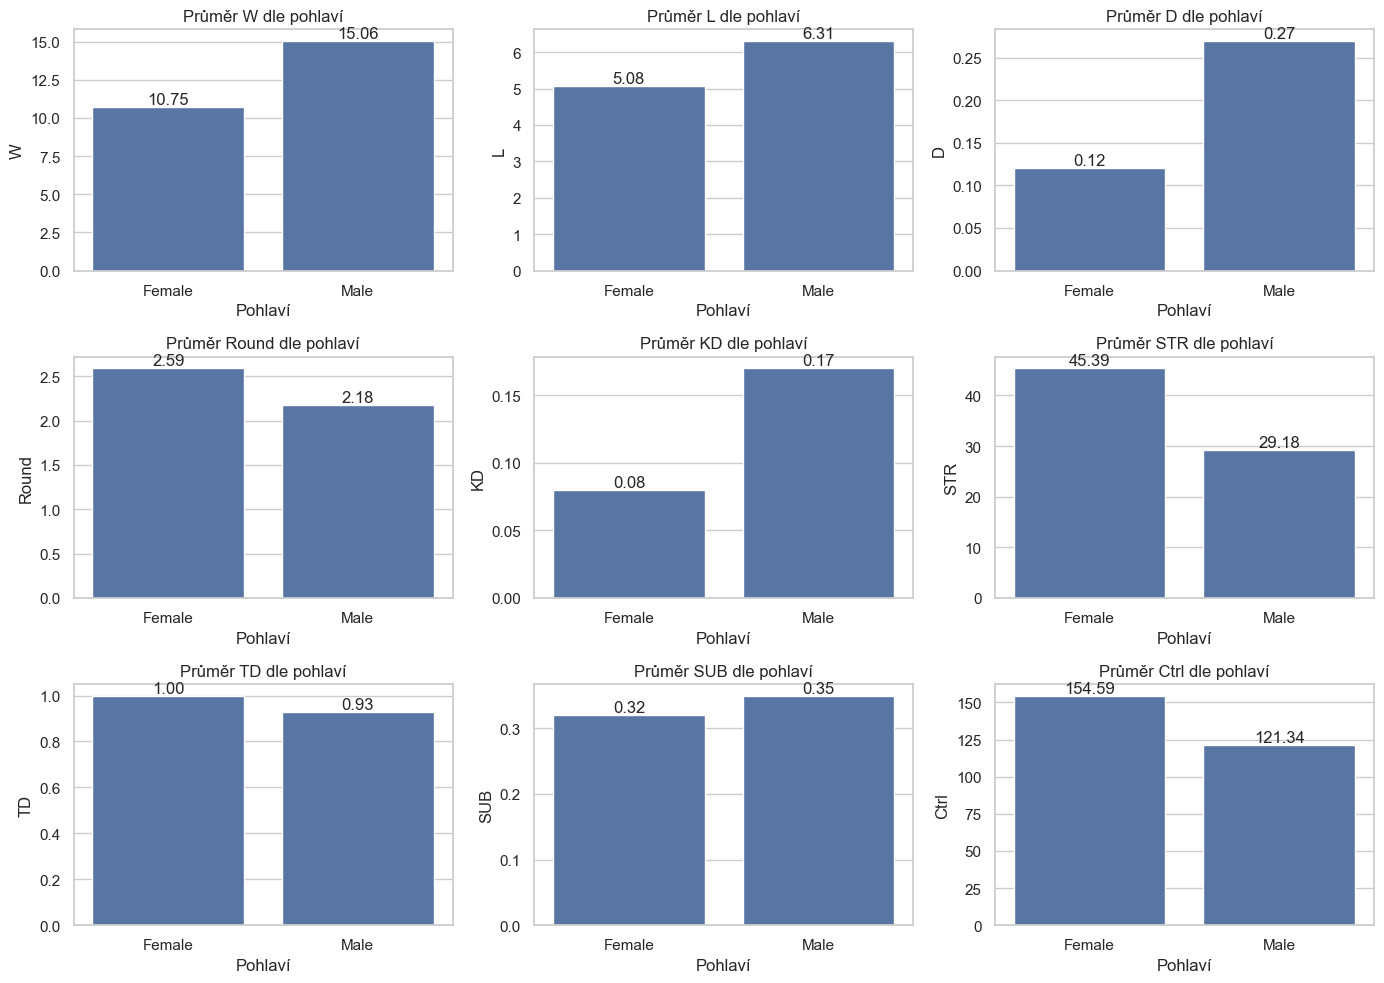

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flatten()

gender_order = gender_means_long['Gender'].tolist()

for idx, metric in enumerate(performance_metrics):
    sns.barplot(data=gender_means_long, x='Gender', y=metric, order=gender_order, ax=axes[idx])
    axes[idx].set_title(f'Průměr {metric} dle pohlaví')
    axes[idx].set_xlabel('Pohlaví')
    axes[idx].set_ylabel(metric)

    # přidáme popisky s hodnotami na každý pruh v barplotu
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.2f')

# Pokud počet metrik není násobkem 3, skryjeme prázdné subploty
if len(performance_metrics) < len(axes):
    for ax in axes[len(performance_metrics):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

## 6. Min-Max škálování vybraných numerických atributů
Pro lepší porovnání výkonových metrik aplikujeme škálování do intervalu ⟨0,1⟩ pomocí `MinMaxScaler` ze scikit-learn. Nejprve zvolíme vhodné numerické sloupce, poté vytvoříme nový DataFrame se škálovanými hodnotami a porovnáme rozdíly vůči původním datům.

In [14]:
# Vybereme pouze numerické sloupce, převedeme na pythonovské pole (list)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['Ht.',
 'Wt.',
 'W',
 'L',
 'D',
 'Round',
 'KD',
 'STR',
 'TD',
 'SUB',
 'Ctrl',
 'Sig. Str. %',
 'Head_%',
 'Body_%',
 'Leg_%',
 'Distance_%',
 'Clinch_%',
 'Ground_%',
 'Sub. Att',
 'Rev.']

In [15]:
# Vytvoříme instanci MinMaxScaler, což je škálovač, který převede všechny hodnoty do rozsahu 0 až 1
scaler = MinMaxScaler()

# Použijeme fit_transform na vybrané numerické sloupce
# fit_transform nejprve "naučí" škálovač na datech (fit) a pak data převede (transform) na škálovaná data
# výstupem je numpy pole
scaled_array = scaler.fit_transform(df[numeric_cols])

# převedeme numpy pole zpět na DataFrame, přidáme příponu _scaled k názvům sloupců a zachováme původní indexy
scaled_df = pd.DataFrame(scaled_array, columns=[f"{col}_scaled" for col in numeric_cols], index=df.index)
scaled_df.head() # vypis prvních 5 řádků

,Ht._scaled,Wt._scaled,W_scaled,L_scaled,D_scaled,Round_scaled,KD_scaled,STR_scaled,TD_scaled,SUB_scaled,Ctrl_scaled,Sig. Str. %_scaled,Head_%_scaled,Body_%_scaled,Leg_%_scaled,Distance_%_scaled,Clinch_%_scaled,Ground_%_scaled,Sub. Att_scaled,Rev._scaled
0,0.061111,0.061069,0.015810,0.113208,0.000000,0.333333,0.000000,0.210714,0.00000,0.000000,0.069095,0.36,0.30,0.89,0.00,0.27,0.55,0.38,0.000000,0.00
1,0.555556,0.229008,0.039526,0.283019,0.000000,0.036667,0.073333,0.061929,0.07000,0.048889,0.051508,0.50,0.45,0.28,0.00,0.32,0.35,0.38,0.048889,0.02
2,0.666667,0.227481,0.023715,0.018868,0.000000,0.666667,0.110000,0.373786,0.16625,0.000000,0.189698,0.50,0.41,0.78,0.80,0.46,0.22,0.49,0.000000,0.00
3,0.666667,0.106870,0.031621,0.000000,0.090909,0.333333,0.110000,0.197643,0.04125,0.000000,0.054020,0.48,0.46,0.74,0.33,0.34,0.54,0.62,0.000000,0.00
4,0.722222,0.183206,0.079051,0.150943,0.000000,0.393333,0.060000,0.163000,0.08000,0.020000,0.124824,0.43,0.37,0.42,0.68,0.30,0.38,0.38,0.020000,0.00


In [16]:
scaled_summary = scaled_df.describe().T # statistický přehled o škálovaných datech
scaled_summary

,count,mean,std,min,25%,50%,75%,max
Ht._scaled,2581.0,0.418727,0.235473,0.0,0.222222,0.444444,0.611111,1.0
Wt._scaled,2581.0,0.082204,0.060346,0.0,0.045802,0.061069,0.106870,1.0
W_scaled,2581.0,0.057869,0.038246,0.0,0.035573,0.051383,0.071146,1.0
L_scaled,2581.0,0.116848,0.085657,0.0,0.056604,0.094340,0.150943,1.0
D_scaled,2581.0,0.023317,0.071863,0.0,0.000000,0.000000,0.000000,1.0
Round_scaled,2581.0,0.407191,0.209211,0.0,0.316667,0.433333,0.563333,1.0
KD_scaled,2581.0,0.053769,0.080578,0.0,0.000000,0.000000,0.083333,1.0
STR_scaled,2581.0,0.219769,0.144336,0.0,0.114286,0.200000,0.307143,1.0
TD_scaled,2581.0,0.117082,0.123851,0.0,0.017500,0.083750,0.173750,1.0
SUB_scaled,2581.0,0.077220,0.109181,0.0,0.000000,0.037778,0.111111,1.0


### 6.1 Původní vs. škálované hodnoty u vybraných metrik
Porovnáváme rozložení původních a škálovaných hodnot pro klíčové metriky výkonu (`W`, `L`, `KD`, `STR`, `TD`, `SUB`).

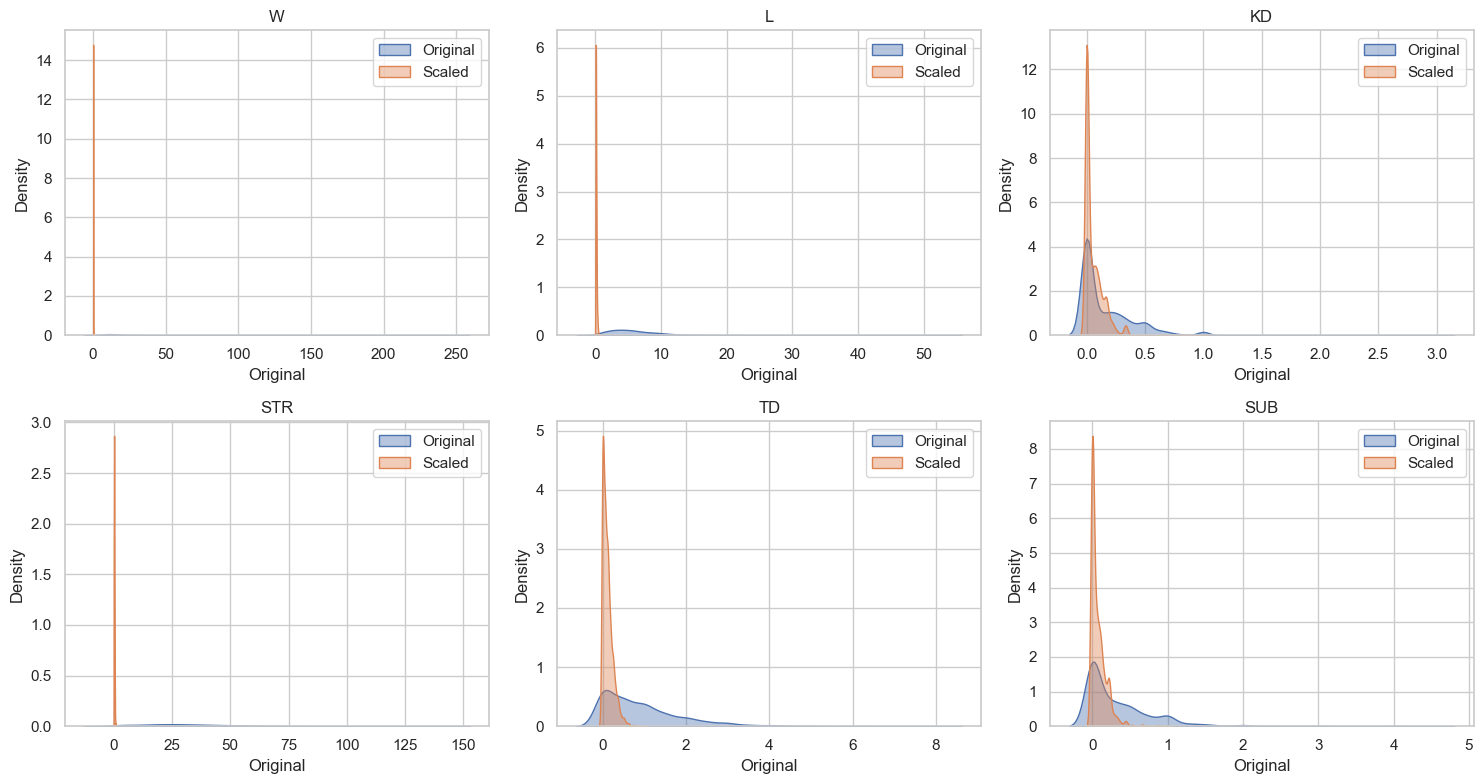

In [ ]:
# Klíčové metriky výkonu:
# W - počet výher
# L - počet proher
# KD - počet knockdownů
# STR - úspěšnost zásahů v %
# TD - úspěšnost takedownů v %
# SUB - počet submisí
# vyhodili jsme control, round a draw
selected_metrics = ['W', 'L', 'KD', 'STR', 'TD', 'SUB']

# vytvoříme nový DataFrame pro snadnější vykreslení
# v něm bude sloupec Metric, který bude obsahovat názvy metrik (W, L, KD, STR, TD, SUB)
# sloupec Original bude obsahovat původní hodnoty z df
# sloupec Scaled bude obsahovat škálované hodnoty z scaled_df
# použijeme np.repeat a np.concatenate pro vytvoření těchto sloupců
plot_df = pd.DataFrame({
    'Metric': np.repeat(selected_metrics, len(df)),
    'Original': np.concatenate([df[m].values for m in selected_metrics]),
    'Scaled': np.concatenate([scaled_df[f"{m}_scaled"].values for m in selected_metrics])
})

# vytvoříme subplots 2x3 pro 6 metrik
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

# projdeme každou metriku a na příslušnou osu vykreslíme KDE ploty pro původní a škálované hodnoty
# KDE plot je odhad hustoty pravděpodobnosti, který ukazuje rozložení dat
for idx, metric in enumerate(selected_metrics):
    # vybereme podmnožinu dat pro aktuální metriku - tedy v každé iteraci budou v proměnné subset pouze řádky pro danou metriku
    subset = plot_df[plot_df['Metric'] == metric]

    # pro každou metriku do jednoho grafu vykreslíme dva KDE ploty - jeden pro původní hodnoty a druhý pro škálované hodnoty
    sns.kdeplot(data=subset, x='Original', label='Original', ax=axes[idx], fill=True, alpha=0.4)
    sns.kdeplot(data=subset, x='Scaled', label='Scaled', ax=axes[idx], fill=True, alpha=0.4)

    axes[idx].set_title(metric)
    axes[idx].legend()


plt.tight_layout()
plt.show()

### Interpretace KDE grafů - první 3
- `W`, `L` a `KD` sledují rozdíl mezi původními hodnotami (modrá) a škálovanými hodnotami (oranžová) po aplikaci Min-Max škálování.
- Originální hodnoty zůstávají ve svém přirozeném rozsahu, proto mají u `W` a `L` dlouhý pravý ocas (několik zápasníků s vysokými počty vítězství/proher).
- Škálované křivky kopírují tvar původní distribuce, ale jsou stlačené k hodnotám 0–1; u `W` a `L` je většina pravděpodobnostní hmoty blízko 0, protože typický zápasník má mnohem méně vítězství/proher než maximální pozorovaná hodnota.
- U `KD` je vidět, že většina zápasníků má nízký počet knockdownů; škálování pouze převádí tuto skutečnost na relativní osu 0–1, což usnadňuje porovnání s dalšími metrikami.

## 7. Shrnutí a doporučení
- Dataset obsahuje 2581 záznamů a 28 sloupců, po kontrole nebyly nalezeny chybějící hodnoty.
- Většinu zápasníků tvoří muži, převažuje postoj `Orthodox` a styl `Hybrid`/`Striker`, nejčetnější váhové kategorie jsou `Lightweight` a `Welterweight`.
- Výkonnostní metriky vykazují různá rozložení; počet výher a proher má delší pravý ocas, zatímco knockdowny jsou soustředěny u nižších hodnot.
- Korelační analýza ukázala silnější vazby mezi páry (`Round`, `Ctrl`) a (`W`, `STR`), což může naznačovat vztah mezi časem v boji a kontrolou soupeře.
- Min-Max škálování umožňuje přímo porovnávat zápasníky napříč metrikami; škálovaná verze statistik je dostupná v `df_scaled` a vizualizace potvrzuje normalizaci do intervalu ⟨0,1⟩.